## --- 0.0. Libraries importing ---

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# dataframe manipulation
import numpy as np
import pandas as pd

# Path
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).parent)

data_path = 'data/prepared_data'

# set notebook width to 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from libraries.Other_Functions import (get_categorical_column_distribution,
                                       get_numerical_column_distribution)

from libraries.Visualization import (plot_distribution)

# 1. Data Loading

In [2]:
############################## 1. DIABETES ##############################
df_diabetes = (
                pd
                .concat(
                            objs = [
                                
                                    (
                                        pd
                                        .concat(objs=[pd.read_csv(f"{data_path}/diabetes/X_train.csv", low_memory=False), pd.read_csv(f"{data_path}/diabetes/X_test.csv", low_memory=False)],
                                             axis=0)
                                        .reset_index(drop=True)
                                    ),
                                    
                                    (
                                        pd
                                        .concat(objs=[pd.read_csv(f"{data_path}/diabetes/y_train.csv", low_memory=False), pd.read_csv(f"{data_path}/diabetes/y_test.csv", low_memory=False)],
                                             axis=0)
                                        .reset_index(drop=True)
                                    ),
                                   ],
                            axis=1 
                        )
              )

display(df_diabetes.head())
print(f"Shape of the diabetes data: {df_diabetes.shape}.")

############################## 2. TITANIC ##############################
df_titanic = (
                pd
                .concat(
                            objs = [
                                
                                    (
                                        pd
                                        .concat(objs=[pd.read_csv(f"{data_path}/titanic/X_train.csv", low_memory=False), pd.read_csv(f"{data_path}/titanic/X_test.csv", low_memory=False)],
                                             axis=0)
                                        .reset_index(drop=True)
                                    ),
                                    
                                    (
                                        pd
                                        .concat(objs=[pd.read_csv(f"{data_path}/titanic/y_train.csv", low_memory=False), pd.read_csv(f"{data_path}/titanic/y_test.csv", low_memory=False)],
                                             axis=0)
                                        .reset_index(drop=True)
                                    ),
                                   ],
                            axis=1 
                        )
              )

display(df_titanic.head())
print(f"Shape of the titanic data: {df_titanic.shape}.")

############################## 3. EMPLOYEES ##############################
df_empolyees = (
                   pd
                   .concat(
                               objs = [
                                
                                       (
                                           pd
                                           .concat(objs=[pd.read_csv(f"{data_path}/employees/X_train.csv", low_memory=False), pd.read_csv(f"{data_path}/employees/X_test.csv", low_memory=False)],
                                                axis=0)
                                           .reset_index(drop=True)
                                       ),
                                    
                                       (
                                           pd
                                           .concat(objs=[pd.read_csv(f"{data_path}/employees/y_train.csv", low_memory=False), pd.read_csv(f"{data_path}/employees/y_test.csv", low_memory=False)],
                                                axis=0)
                                           .reset_index(drop=True)
                                       ),
                                   ]   ,
                               axis=1 
                           )
               )

display(df_empolyees.head())
print(f"Shape of the employees data: {df_empolyees.shape}.")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,44.0,No,No,never,33.28,6.1,130,0
1,Female,34.0,No,No,ever,25.33,6.5,140,0
2,Male,55.0,No,No,ever,24.53,4.5,155,0
3,Female,46.0,No,No,no info,38.39,5.8,145,0
4,Female,46.0,No,No,ever,23.84,6.2,90,0


Shape of the diabetes data: (9999, 9).


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,Female,44.0,0,0,27.7208,1
1,3,Male,32.0,0,0,7.9250,0
2,3,Female,31.0,0,0,8.6833,1
3,3,Male,26.0,0,31,7.8875,0
4,3,Male,32.0,0,0,7.9250,1


Shape of the titanic data: (684, 7).


,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Irrelevant_Predictor1,Irrelevant_Predictor2,Irrelevant_Predictor3,LeaveOrNot
0,2016,3,28,Female,No,2,0.194349,3.505554,a2,0
1,2018,3,40,Male,Yes,4,0.365975,0.885374,a2,1
2,2013,2,38,Female,No,1,0.925782,1.817544,a1,1
3,2013,3,39,Male,No,5,0.805464,3.358316,a2,1
4,2013,3,27,Female,Yes,5,0.684837,3.260181,a1,0


Shape of the employees data: (3200, 10).


# 2. Analysis

## --- 2.0 Dictionaries ---

In [3]:
diabetes_dictionary = {
    'gender': 'categorical',
    'age': 'numerical',
    'hypertension': 'categorical',
    'heart_disease': 'categorical',
    'smoking_history': 'categorical',
    'bmi': 'numerical',
    'HbA1c_level': 'numerical',
    'blood_glucose_level': 'numerical',
    'diabetes': 'categorical'
}

titanic_dictionary = {
    'Pclass': 'numerical',
    'Sex': 'categorical',
    'Age': 'numerical',
    'SibSp': 'numerical',
    'Parch': 'numerical',
    'Fare': 'numerical',
    'Survived': 'categorical'
}

employees_dictionary = {
    'JoiningYear': 'numerical',
    'PaymentTier': 'numerical',
    'Age': 'numerical',
    'Gender': 'categorical',
    'EverBenched': 'categorical',
    'ExperienceInCurrentDomain': 'numerical',
    'Irrelevant_Predictor1': 'numerical',
    'Irrelevant_Predictor2': 'numerical',
    'Irrelevant_Predictor3': 'categorical',
    'LeaveOrNot': 'categorical'
}

## --- 2.1. Diabetes (variables distribution) ---

Shape of the data: (9999, 9).


,Count,Proportion
gender,,
Female,5831,58.32 %
Male,4168,41.68 %


,Value (age)
Statistics,
count,9999.00
mean,41.69
std,22.37
min,0.08
25%,24.00
50%,43.00
75%,59.00
max,80.00


,Count,Proportion
hypertension,,
No,9257,92.58 %
Yes,742,7.42 %


,Count,Proportion
heart_disease,,
No,9600,96.01 %
Yes,399,3.99 %


,Count,Proportion
smoking_history,,
no info,3712,37.12 %
never,3451,34.51 %
ever,1961,19.61 %
current,875,8.75 %


,Value (bmi)
Statistics,
count,9999.00
mean,27.25
std,6.61
min,10.30
25%,23.62
50%,27.32
75%,29.50
max,83.74


,Value (HbA1c_level)
Statistics,
count,9999.00
mean,5.53
std,1.06
min,3.50
25%,4.80
50%,5.80
75%,6.20
max,9.00


,Value (blood_glucose_level)
Statistics,
count,9999.00
mean,138.52
std,40.06
min,80.00
25%,100.00
50%,140.00
75%,159.00
max,300.00


,Count,Proportion
diabetes,,
0,9149,91.5 %
1,850,8.5 %


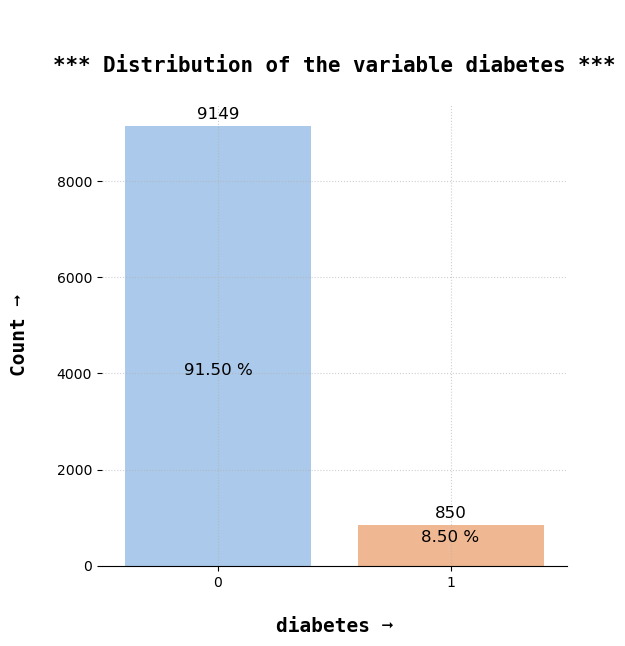

In [4]:
print(f'Shape of the data: {df_diabetes.shape}.')

for (column, d_type) in diabetes_dictionary.items():
    if d_type == 'numerical':
        display(
                    get_numerical_column_distribution(
                                                        df=df_diabetes,
                                                        column=column
                                                     )
               )
    else:
        display(
                    get_categorical_column_distribution(
                                                            df=df_diabetes,
                                                            column=column
                                                        )
               )  
        
plot_distribution(df=df_diabetes,
                  column='diabetes')

## --- 2.2. Titanic (variables distribution) ---

Shape of the data: (684, 7).


,Value (Pclass)
Statistics,
count,684.00
mean,2.25
std,0.86
min,1.00
25%,1.00
50%,3.00
75%,3.00
max,3.00


,Count,Proportion
Sex,,
Male,398,58.19 %
Female,286,41.81 %


,Value (Age)
Statistics,
count,567.00
mean,34.44
std,26.44
min,0.42
25%,20.75
50%,29.00
75%,40.00
max,139.00


,Value (SibSp)
Statistics,
count,684.00
mean,0.50
std,0.97
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,8.00


,Value (Parch)
Statistics,
count,684.00
mean,1.53
std,5.72
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,39.00


,Value (Fare)
Statistics,
count,684.00
mean,192.03
std,748.36
min,0.00
25%,8.05
50%,18.00
75%,46.90
max,3994.54


,Count,Proportion
Survived,,
1,342,50.0 %
0,342,50.0 %


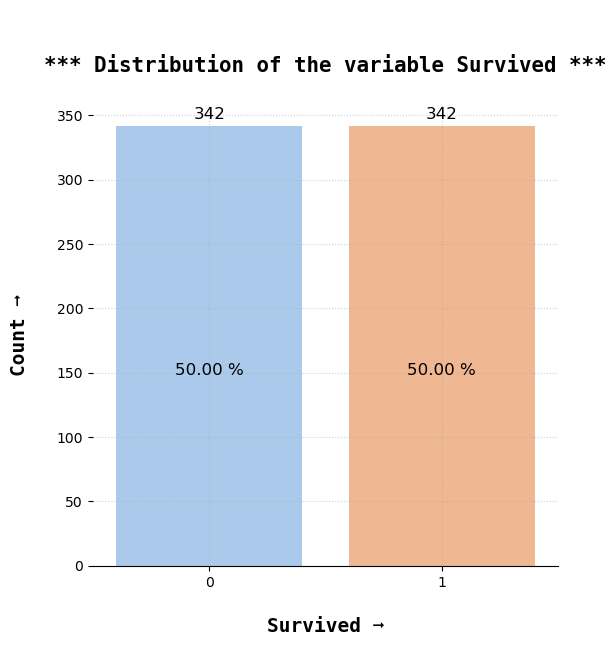

In [5]:
print(f'Shape of the data: {df_titanic.shape}.')

for (column, d_type) in titanic_dictionary.items():
    if d_type == 'numerical':
        display(
                    get_numerical_column_distribution(
                                                        df=df_titanic,
                                                        column=column
                                                     )
               )
    else:
        display(
                    get_categorical_column_distribution(
                                                            df=df_titanic,
                                                            column=column
                                                        )
               )  
        
plot_distribution(df=df_titanic,
                  column='Survived')

### --- 2.3. Employees (variables distribution) ---

Shape of the data: (3200, 10).


,Value (JoiningYear)
Statistics,
count,3200.00
mean,2015.15
std,1.90
min,2012.00
25%,2014.00
50%,2015.00
75%,2017.00
max,2018.00


,Value (PaymentTier)
Statistics,
count,3200.00
mean,2.66
std,0.58
min,1.00
25%,2.00
50%,3.00
75%,3.00
max,3.00


,Value (Age)
Statistics,
count,3200.00
mean,29.35
std,4.84
min,22.00
25%,26.00
50%,28.00
75%,32.00
max,41.00


,Count,Proportion
Gender,,
Male,1809,56.53 %
Female,1391,43.47 %


,Count,Proportion
EverBenched,,
No,2855,89.22 %
Yes,345,10.78 %


,Value (ExperienceInCurrentDomain)
Statistics,
count,3200.00
mean,2.86
std,1.56
min,0.00
25%,2.00
50%,3.00
75%,4.00
max,7.00


,Value (Irrelevant_Predictor1)
Statistics,
count,3200.00
mean,0.50
std,0.29
min,0.00
25%,0.25
50%,0.50
75%,0.75
max,1.00


,Value (Irrelevant_Predictor2)
Statistics,
count,3200.00
mean,2.50
std,1.46
min,0.00
25%,1.22
50%,2.50
75%,3.79
max,5.00


,Count,Proportion
Irrelevant_Predictor3,,
a1,1655,51.72 %
a2,1545,48.28 %


,Count,Proportion
LeaveOrNot,,
0,1600,50.0 %
1,1600,50.0 %


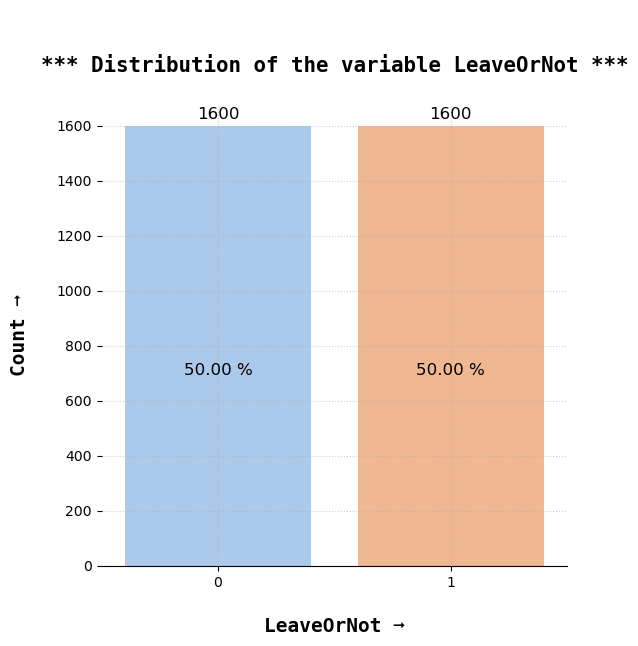

In [6]:
print(f'Shape of the data: {df_empolyees.shape}.')

for (column, d_type) in employees_dictionary.items():
    if d_type == 'numerical':
        display(
                    get_numerical_column_distribution(
                                                        df=df_empolyees,
                                                        column=column
                                                     )
               )
    else:
        display(
                    get_categorical_column_distribution(
                                                            df=df_empolyees,
                                                            column=column
                                                        )
               )  
        
plot_distribution(df=df_empolyees,
                  column='LeaveOrNot')